In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("sentiment shape:", sentiment.shape)
print("trades shape:", trades.shape)

sentiment shape: (2644, 4)
trades shape: (211224, 16)


In [3]:
sentiment.columns = sentiment.columns.str.strip()
trades.columns = trades.columns.str.strip()

print("Sentiment columns:", sentiment.columns.tolist())
print("Trades columns:", trades.columns.tolist())

Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Trades columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [60]:
# Standardize names
sentiment = sentiment.rename(columns={
    sentiment.columns[0]: "date_raw",
    sentiment.columns[1]: "fear_greed_index"
})

# Parse sentiment date: unix seconds (this was your working fix)
sentiment["date_dt"] = pd.to_datetime(pd.to_numeric(sentiment["date_raw"], errors="coerce"), unit="s", errors="coerce")
sentiment["date_key"] = sentiment["date_dt"].dt.date

# Convert index to numeric
sentiment["fear_greed_index"] = pd.to_numeric(sentiment["fear_greed_index"], errors="coerce")

# Create labels (simple Fear vs Greed as assignment needs)
sentiment["classification"] = np.where(sentiment["fear_greed_index"] < 50, "Fear", "Greed")

print(sentiment[["date_raw","date_key","fear_greed_index","classification"]].head())
print("Sentiment date range:", sentiment["date_key"].dropna().min(), "to", sentiment["date_key"].dropna().max())

     date_raw    date_key  fear_greed_index classification
0  1517463000  2018-02-01                30           Fear
1  1517549400  2018-02-02                15           Fear
2  1517635800  2018-02-03                40           Fear
3  1517722200  2018-02-04                24           Fear
4  1517808600  2018-02-05                11           Fear
Sentiment date range: 2018-02-01 to 2025-05-02


In [61]:
# Parse trades timestamp (unix milliseconds)
trades["timestamp_dt"] = pd.to_datetime(trades["Timestamp"], unit="ms", errors="coerce")
trades["date_key"] = trades["timestamp_dt"].dt.date

print(trades[["Timestamp","timestamp_dt","date_key"]].head())
print("Trades date range:", trades["date_key"].dropna().min(), "to", trades["date_key"].dropna().max())

      Timestamp        timestamp_dt    date_key
0  1.730000e+12 2024-10-27 03:33:20  2024-10-27
1  1.730000e+12 2024-10-27 03:33:20  2024-10-27
2  1.730000e+12 2024-10-27 03:33:20  2024-10-27
3  1.730000e+12 2024-10-27 03:33:20  2024-10-27
4  1.730000e+12 2024-10-27 03:33:20  2024-10-27
Trades date range: 2023-03-28 to 2025-06-15


In [62]:
data = trades.merge(
    sentiment[["date_key","classification","fear_greed_index"]],
    on="date_key",
    how="left"
)

# Standardize column names for easier coding
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

print("Sentiment coverage:", data["classification"].notna().mean())
print(data["classification"].value_counts(dropna=False).head())
data.head()

Sentiment coverage: 0.8723582547437791
classification
Fear     133871
Greed     50392
NaN       26961
Name: count, dtype: int64


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,timestamp_dt,date_key,classification,fear_greed_index
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0


In [63]:
daily_pnl = data.groupby(["account","date_key"])["closed_pnl"].sum().reset_index(name="daily_pnl")
daily_pnl.head()

,account,date_key,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04


In [64]:
data["win"] = data["closed_pnl"] > 0
win_rate = data.groupby("account")["win"].mean().reset_index(name="win_rate")
win_rate.head()

,account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [65]:
avg_trade_size = data.groupby("account")["size_usd"].mean().reset_index(name="avg_trade_size")
avg_trade_size.head()

,account,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [68]:
trades_per_day = data.groupby(["account","date_key"]).size().reset_index(name="trades_per_day")
trades_per_day.head()

,account,date_key,trades_per_day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,462
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,3356
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,320
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,3533
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,3427


  classification  closed_pnl
0           Fear   50.047622
1          Greed   69.958017


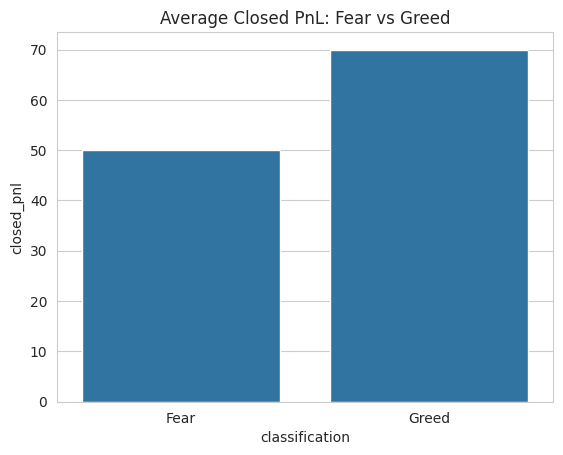

In [71]:
df = data.dropna(subset=["classification"])

perf = df.groupby("classification")["closed_pnl"].mean().reset_index()
print(perf)

sns.barplot(data=perf, x="classification", y="closed_pnl")
plt.title("Average Closed PnL: Fear vs Greed")
plt.show()

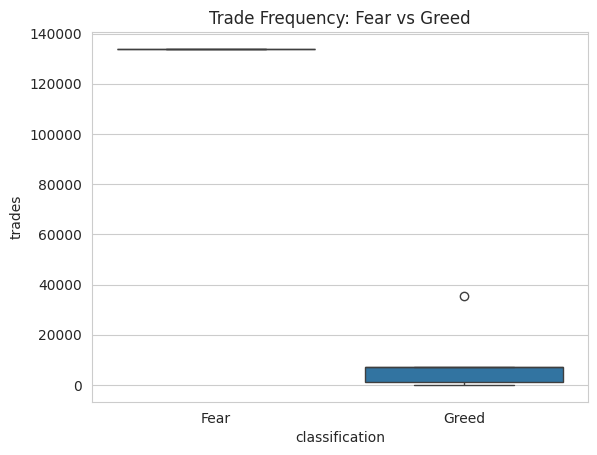

In [73]:
freq = df.groupby(["classification","date_key"]).size().reset_index(name="trades")

sns.boxplot(data=freq, x="classification", y="trades")
plt.title("Trade Frequency: Fear vs Greed")
plt.show()

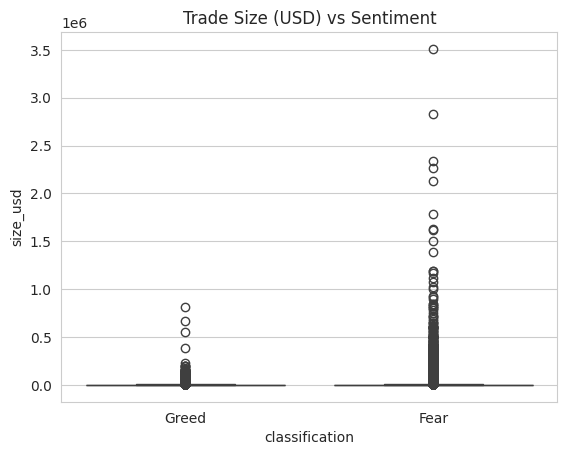

In [75]:
sns.boxplot(data=df, x="classification", y="size_usd")
plt.title("Trade Size (USD) vs Sentiment")
plt.show()

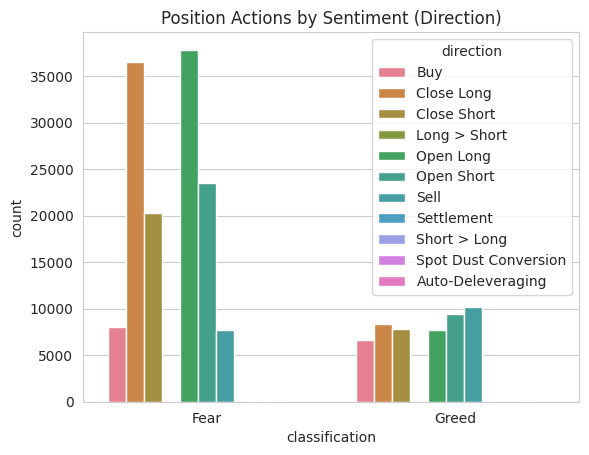

In [79]:
dir_counts = df.groupby(["classification","direction"]).size().reset_index(name="count")

sns.barplot(data=dir_counts, x="classification", y="count", hue="direction")
plt.title("Position Actions by Sentiment (Direction)")
plt.show()

In [83]:
metrics = df.groupby("account").agg(
    avg_pnl=("closed_pnl","mean"),
    avg_size=("size_usd","mean"),
    trade_count=("trade_id","count")
).reset_index()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(metrics[["avg_pnl","avg_size","trade_count"]])

kmeans = KMeans(n_clusters=3, random_state=42)
metrics["segment"] = kmeans.fit_predict(X)

metrics.groupby("segment")[["avg_pnl","avg_size","trade_count"]].mean()

,avg_pnl,avg_size,trade_count
segment,,,
0,253.008418,12399.318266,3355.000000
1,38.614933,1930.298496,18350.166667
2,57.232756,3920.064138,2586.294118


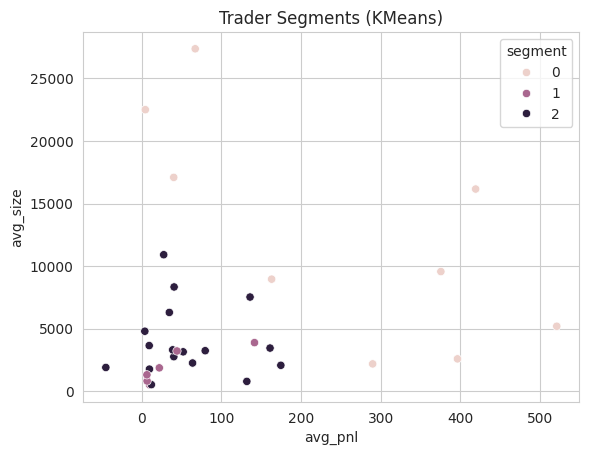

In [85]:
sns.scatterplot(data=metrics, x="avg_pnl", y="avg_size", hue="segment")
plt.title("Trader Segments (KMeans)")
plt.show()

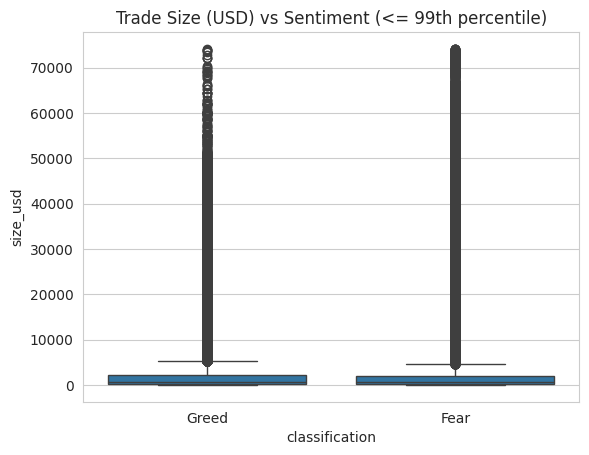

In [87]:
# cap at 99th percentile for better boxplots (visualization only)
cap = df["size_usd"].quantile(0.99)
sns.boxplot(data=df[df["size_usd"] <= cap], x="classification", y="size_usd")
plt.title("Trade Size (USD) vs Sentiment (<= 99th percentile)")
plt.show()